# Определение перспективного тарифа для телеком-компании

**Краткое описание проекта**

Клиентам федерального оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Есть данные небольшой выборки клиентов за 2018 г.: характеристики 500 пользователей и потребляемого ими трафика.

**Постановка задачи** 

Для целей корректировки рекламного бюджета необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше с точки зрения генерации положительных денежных потоков для компании.

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('datasets/calls.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_messages = pd.read_csv('datasets/messages.csv')
df_tariffs = pd.read_csv('datasets/tariffs.csv')
df_users = pd.read_csv('datasets/users.csv')

In [3]:
def hello(dataset):
    return dataset.info(), display(dataset.head())

In [4]:
hello(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


(None, None)

In [5]:
hello(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


(None, None)

In [6]:
hello(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


(None, None)

In [7]:
hello(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


(None, None)

In [8]:
hello(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


(None, None)

### Вывод 1

Исходя из общего знакомства с данными сразу можно выделить следующие пункты для предобработки данных:

1) пропущенные значения:

- ни в одной таблице нет пропущенных значений
- за исключением столбца churn_date в df_users, но здесь пропуски заменять не нужно, поскольку отсутствие значений означает то, что на момент выгрузки тариф еще действовал

2) изменение типа данных: 

- нужно привести все столбцы с датами к типу datetime

3) нужно удалить лишний столбец в таблице df_internet

## Предобработка данных

In [9]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
# фильтрация из df_internet ненужного столбца (дублирует номера строк - индексы df)

df_internet = df_internet.loc[:, 'id': 'user_id']
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [11]:
# приводим все столбцы с датами во всех датасэтах к типу datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

### Вывод 2

1) все столбцы с датами приведены к типу datetime

2) удален лишний столбец Unnamed: 0 в таблице df_internet (дублировал индексы строк df)

## Расчёты и добавление результатов в таблицу

In [12]:
# добавим по всем таблицам с трафиком (минуты, мб, сообщения) столбец месяц

df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

In [13]:
# создаем новую таблицу на основе группировки по пользователю и месяцу

df_calls_group = df_calls.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}) 

# избавляемся от мультиндекса

df_calls_group = df_calls_group['duration']

# переназовем столбцы для дальнейшего удобства

df_calls_group = df_calls_group.rename(columns={'count': 'calls_count'})
df_calls_group = df_calls_group.rename(columns={'sum': 'calls_duration'})
df_calls_group.head()

calls_count  calls_duration
user_id month                             
1000    5               22          150.06
        6               43          158.90
        7               47          318.80
        8               52          389.87
        9               58          440.14

In [14]:
# создаем новую таблицу на основе группировки по пользователю и месяцу

df_internet_group = df_internet.groupby(['user_id', 'month']).sum()

# переведем мб в гб, округлив в сторону увеличения

df_internet_group['mb_used'] = np.ceil(df_internet_group['mb_used'] / 1024)

# переназовем столбцы для дальнейшего удобства

df_internet_group = df_internet_group.rename(columns={'mb_used': 'gb_used'})
df_internet_group.head()

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

In [15]:
# создаем новую таблицу на основе группировки по пользователю и месяцу

df_messages_group = df_messages.groupby(['user_id', 'month']).count()

# удаляем лишний столбец

df_messages_group = df_messages_group.drop(columns = 'message_date', axis = 1)

# переназовем столбец для дальнейшего удобства

df_messages_group = df_messages_group.rename(columns={'id': 'messages'})
df_messages_group.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

In [16]:
# формируем сводную таблицу со сводными данными по месяцам по различным видам трафика

data = df_calls_group.join(df_internet_group, how='outer')
data = data.join(df_messages_group, how='outer')

# добавляем столбец с индексами в data_joint

data = data.reset_index()
data.head()

,user_id,month,calls_count,calls_duration,gb_used,messages
0,1000,5,22.0,150.06,3.0,22.0
1,1000,6,43.0,158.90,23.0,60.0
2,1000,7,47.0,318.80,14.0,75.0
3,1000,8,52.0,389.87,14.0,81.0
4,1000,9,58.0,440.14,15.0,57.0


In [17]:
# переименуем столбец из df_tariffs tariff_name в tariff для дальнейшего корректного объединения данных

df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
# объединим в единый датасэт также информацию по пользователям и тарифам

data = data.merge(df_users, on='user_id', how='outer')
data = data.merge(df_tariffs, on='tariff', how='outer')
data.head()

,user_id,month,calls_count,calls_duration,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,150.06,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,158.90,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,318.80,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,389.87,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,440.14,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [19]:
# посмотрим. сколько пропусков появилось после объединения таблиц

data.isna().sum()

user_id                     0
month                       2
calls_count                42
calls_duration             42
gb_used                    13
messages                  499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [20]:
data.shape

(3216, 20)

In [21]:
data.user_id.nunique()

500

- Удалим только те строки, в которых образовались пустые значения по всем видам трафика, и, соответственно, вылезли пустые значения по столбцу month
- Остальные пропуски, за исключением столбца churn_date, заменим на нули

In [22]:
# отфильтруем тех пользователей, по которым вообще не было никакого трафика

data = data[~data['month'].isna()]

In [23]:
# наишем цикл для заполнения пропусков нулями в оставшихся столбцах

columns = ['calls_count', 'calls_duration', 'gb_used', 'messages']

for i in columns:
    data[i] = data[i].fillna(0)

In [24]:
# проверим корректность заполнения пропусков 

data.loc[:, data.columns != 'churn_date'].isna().sum() == 0

user_id                  True
month                    True
calls_count              True
calls_duration           True
gb_used                  True
messages                 True
age                      True
city                     True
first_name               True
last_name                True
reg_date                 True
tariff                   True
messages_included        True
mb_per_month_included    True
minutes_included         True
rub_monthly_fee          True
rub_per_gb               True
rub_per_message          True
rub_per_minute           True
dtype: bool

In [25]:
# приведем столбец month к типу int

data['month'] = data['month'].astype(int)

In [26]:
# рассчитаем в новом столбце разницу между включенными в тариф и использованнными минутами

data['minutes_above'] = data['minutes_included'] - data['calls_duration']

# неиспользованные минуты заменим нулями

data.loc[(data['minutes_above'] > 0), 'minutes_above'] = 0

# оставшиеся значения в столбце возьмем по модулю (= минуты сверх лимита)

data.loc[(data['minutes_above'] < 0), 'minutes_above'] = abs(data.loc[(data['minutes_above'] < 0), 'minutes_above'])

In [27]:
# создадим еще 2 аналогичных столбца по сообщениям и интернет-трафику, и произведем теже манипуляции

data['gb_above'] = np.ceil(data['mb_per_month_included'] / 1024) - data['gb_used']
data.loc[(data['gb_above'] > 0), 'gb_above'] = 0
data.loc[(data['gb_above'] < 0), 'gb_above'] = abs(data.loc[(data['gb_above'] < 0), 'gb_above'])

data['messages_above'] = data['messages_included'] - data['messages']
data.loc[(data['messages_above'] > 0), 'messages_above'] = 0
data.loc[(data['messages_above'] < 0), 'messages_above'] = abs(data.loc[(data['messages_above'] < 0), 'messages_above'])

In [28]:
# создаем новый столбец и рассчитываем помесячную выручку с каждого пользователя

data['revenue'] = (data['minutes_above'] * data['rub_per_minute']
    + data['gb_above'] * data['rub_per_gb']
    + data['messages_above'] * data['rub_per_message']
    + data['rub_monthly_fee'])
data['revenue']

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3210    1750.0
3211     550.0
3212    1150.0
3213    1406.5
3214     598.0
Name: revenue, Length: 3214, dtype: float64

In [29]:
data['revenue'].describe()

count    3214.000000
mean     1506.318923
std       792.756078
min       550.000000
25%       740.717500
50%      1564.190000
75%      1950.000000
max      6613.100000
Name: revenue, dtype: float64

### Вывод 3

1) Данные 3-х датасэтов по трафику (звонки, сообщения, интернет) были приведены к месячным значениям

2) Все 5 датасэтов объединены в единый датасэт data

3) Пропущенные значения, появившиеся в результате объединения, отфильтрованы из датасэта по тем строкам, где есть пропуски по всем 3 видам трафика; остальные пропуски заменены на нулевые значения

3) В финальном датасэте data добавлены новые столбцы и произведены расчеты по каждому пользователю:

- **calls_count, calls_duration** - количество сделанных звонков и израсходованных минут разговора по месяцам
- **messages** - количество отправленных сообщений по месяцам
- **gb_used** - объем израсходованного интернет-трафика по месяцам
- **revenue** - помесячная выручка 

## Анализ данных

In [30]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Расчет среднего значения

In [31]:
# группируем датасэт для расчета средних по различным видам трафика

data_means = round(
    data[['month', 'calls_duration', 'gb_used', 'messages', 'tariff']]
    .groupby(['tariff', 'month']).mean(), 0
)

data_means

calls_duration  gb_used  messages
tariff month                                   
smart  1               193.0      9.0      18.0
       2               283.0     12.0      24.0
       3               368.0     15.0      32.0
       4               346.0     14.0      31.0
       5               365.0     16.0      34.0
       6               373.0     16.0      33.0
       7               385.0     16.0      34.0
       8               398.0     17.0      34.0
       9               405.0     16.0      34.0
       10              402.0     17.0      34.0
       11              411.0     17.0      34.0
       12              452.0     18.0      36.0
ultra  1               405.0     13.0      34.0
       2               281.0     12.0      22.0
       3               462.0     18.0      32.0
       4               432.0     17.0      32.0
       5               482.0     19.0      38.0
       6               453.0     19.0      42.0
       7               515.0     21.0      50.0
       8               482.0     20.0      48.0
       9               509.0     19.0      52.0
       10              527.0     20.0      58.0
       11              511.0     20.0      56.0
       12              560.0     22.0      61.0

In [32]:
# для оценки среднего количества используемого трафика по 2-м тарифам напишем функцию

def graph_medium_traffic(col, traffic, ylabel):
    x=sorted(data['month'].unique())
    y=data_means[col].iloc[:12]
    y1=data_means[col].iloc[12:]
    f1 = 'Среднее кол-во '
    f2 = ' в зависимости от тарифа'
    title = f1 + traffic + f2
    plt.bar(x, y1, label='ultra')
    plt.bar(x, y, label='smart')
    plt.title(title)
    plt.xlabel('месяц')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()    

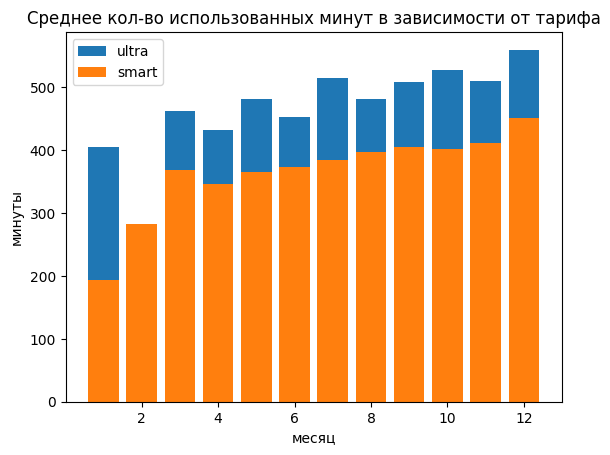

In [33]:
# посмотрим на графике, как соотносятся средние по кол-ву использованных минут в зависимости от тарифа

graph_medium_traffic('calls_duration', 'использованных минут', 'минуты')

In [34]:
print('Среднее количество использованных минут за год по тарифу smart:',
      round(data_means['calls_duration'].iloc[:12].mean()))

Среднее количество использованных минут за год по тарифу smart: 365


In [35]:
print('Среднее количество использованных минут за год по тарифу ultra:',
      round(data_means['calls_duration'].iloc[12:].mean()))

Среднее количество использованных минут за год по тарифу ultra: 468


- Видна тенденция к росту среднего количества использованных минут в течение года по тарифу smart (от 200-300 минут в начале года до 400-450 минут в конце года)
- И не такая очевидная, но все же тоже тенденция к росту (начиная с апреля) по тарифу ultra
- Примечательно, что если по тарифу smart пользователи в среднем выбирают 369 минут из 500 включенных (более 70%), то по тарифу ulta - всего в среднем 477 минут из 3000 включенных (чуть более 15%)

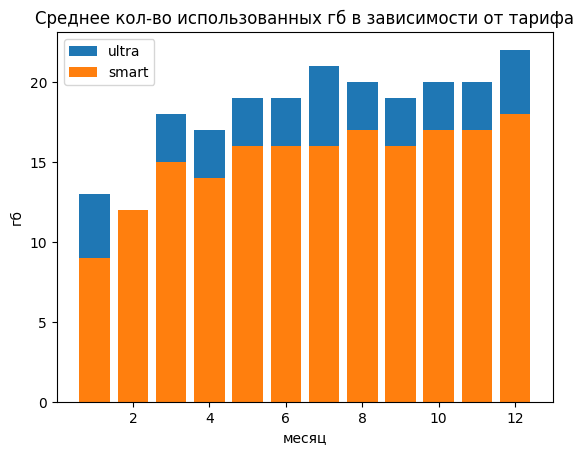

In [36]:
# посмотрим на графике, как соотносятся средние по кол-ву использованных гб в зависимости от тарифа

graph_medium_traffic('gb_used', 'использованных гб', 'гб')

In [37]:
print('Среднее количество использованных гб за год по тарифу smart:',
      round(data_means['gb_used'].iloc[:12].mean(), 0))

Среднее количество использованных гб за год по тарифу smart: 15.0


In [38]:
print('Среднее количество использованных гб за год по тарифу ultra:',
      round(data_means['gb_used'].iloc[12:].mean(), 0))

Среднее количество использованных гб за год по тарифу ultra: 18.0


- Видна тенденция к росту среднего количества использованных гб в течение года по обоим тарифам: от 9 до 18 гб по тарифу smart и от 14 до 22 гб по тарифу ultra
- Также, как и по минутам пользователи тарифа smart выбирают намного больше гб из включенных в тариф: в среднем за год 15 из 15 гб против 18 из 30 гб по тарифу ultra

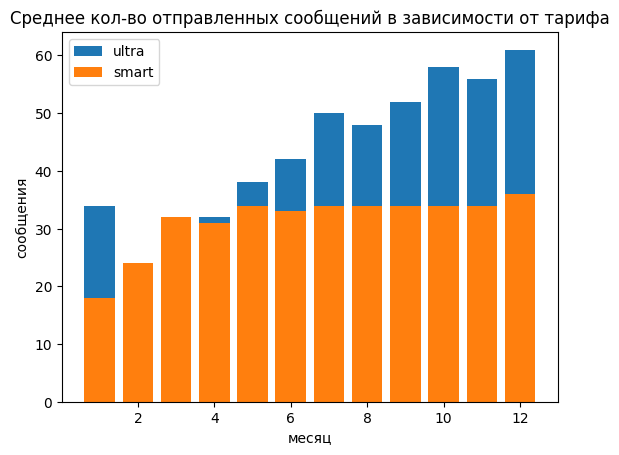

In [39]:
# посмотрим на графике, как соотносятся средние по кол-ву отправленных сообщений в зависимости от тарифа

graph_medium_traffic('messages', 'отправленных сообщений', 'сообщения')

In [40]:
print('Среднее количество отправленных сообщений за год по тарифу smart:',
      round(data_means['messages'].iloc[:12].mean(), 0))

Среднее количество отправленных сообщений за год по тарифу smart: 32.0


In [41]:
print('Среднее количество отправленных сообщений за год по тарифу ultra:',
      round(data_means['messages'].iloc[12:].mean(), 0))

Среднее количество отправленных сообщений за год по тарифу ultra: 44.0


- Видна тенденция к росту среднего количества отправленных сообщений в течение года по обоим тарифам: от 20 до 42 сообщений по тарифу smart и от 43 до 72 сообщений по тарифу ultra
- Также, как и по минутам и по гб пользователи тарифа smart выбирают намного больше сообщений из включенных в тариф: в среднем за год 36 из 50 против 55 из 100 по тарифу ultra

### Расчет дисперсии

In [42]:
# группируем датасэт для расчета дисперсии по различным видам трафика

data_var = round(
    data[['month', 'calls_duration', 'gb_used', 'messages', 'tariff']]
    .groupby(['tariff', 'month'])[['calls_duration', 'gb_used', 'messages']].apply(np.var), 0
)

data_var

calls_duration  gb_used  messages
tariff month                                   
smart  1             20782.0     38.0     255.0
       2             32189.0     37.0     465.0
       3             32528.0     32.0     709.0
       4             30735.0     31.0     597.0
       5             30946.0     34.0     726.0
       6             27279.0     32.0     802.0
       7             28672.0     33.0     796.0
       8             30999.0     30.0     835.0
       9             29911.0     26.0     788.0
       10            31571.0     33.0     813.0
       11            28162.0     27.0     803.0
       12            35412.0     30.0     932.0
ultra  1             57630.0     40.0     836.0
       2             75638.0    105.0     687.0
       3             96963.0    111.0    1686.0
       4             62854.0     88.0    1382.0
       5             73667.0     94.0    1600.0
       6             81105.0     81.0    1963.0
       7             83247.0     95.0    2346.0
       8             86371.0    104.0    2151.0
       9             93263.0     86.0    2134.0
       10            94111.0     91.0    2675.0
       11            85496.0     93.0    2458.0
       12           103545.0    102.0    2663.0

### Расчет СКО

In [43]:
# группируем датасэт для расчета СКО по различным видам трафика

data_std = round(
    data[['month', 'calls_duration', 'gb_used', 'messages', 'tariff']]
    .groupby(['tariff', 'month'])[['calls_duration', 'gb_used', 'messages']].apply(np.std), 0
)

data_std

calls_duration  gb_used  messages
tariff month                                   
smart  1               144.0      6.0      16.0
       2               179.0      6.0      22.0
       3               180.0      6.0      27.0
       4               175.0      6.0      24.0
       5               176.0      6.0      27.0
       6               165.0      6.0      28.0
       7               169.0      6.0      28.0
       8               176.0      5.0      29.0
       9               173.0      5.0      28.0
       10              178.0      6.0      29.0
       11              168.0      5.0      28.0
       12              188.0      5.0      31.0
ultra  1               240.0      6.0      29.0
       2               275.0     10.0      26.0
       3               311.0     11.0      41.0
       4               251.0      9.0      37.0
       5               271.0     10.0      40.0
       6               285.0      9.0      44.0
       7               289.0     10.0      48.0
       8               294.0     10.0      46.0
       9               305.0      9.0      46.0
       10              307.0     10.0      52.0
       11              292.0     10.0      50.0
       12              322.0     10.0      52.0

- Исходя из рассчитанных значений дисперсии и СКО **разброс значений по тарифу ultra по всем видам трафика шире**

### Построение гистограмм. Описание распределений

In [44]:
# создадим функцию для построения графика распределения средней величины трафика в зависимости от тарифа

def hist_traffic_mean(col, traffic, xlabel):
    data_means.loc['smart', col].hist(alpha=0.5, label='smart', figsize=(10, 5))
    data_means.loc['ultra', col].hist(alpha=0.5, label='ultra', figsize=(10, 5))
    title = 'Гистограмма распределения ' + traffic + ' в зависимости от тарифа'
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('частотность')
    plt.legend()
    plt.show()

In [45]:
# создадим функцию для построения графика распределения трафика в зависимости от тарифа

def hist_traffic(col, traffic, xlabel):
    data[data['tariff'] == 'smart'][col].hist(alpha=0.5, label='smart', bins=50, figsize=(10, 5))
    data[data['tariff'] == 'ultra'][col].hist(alpha=0.5, label='ultra', bins=50, figsize=(10, 5))
    title = 'Гистограмма распределения ' + traffic + ' в зависимости от тарифа'
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('частотность')
    plt.legend()
    plt.show()

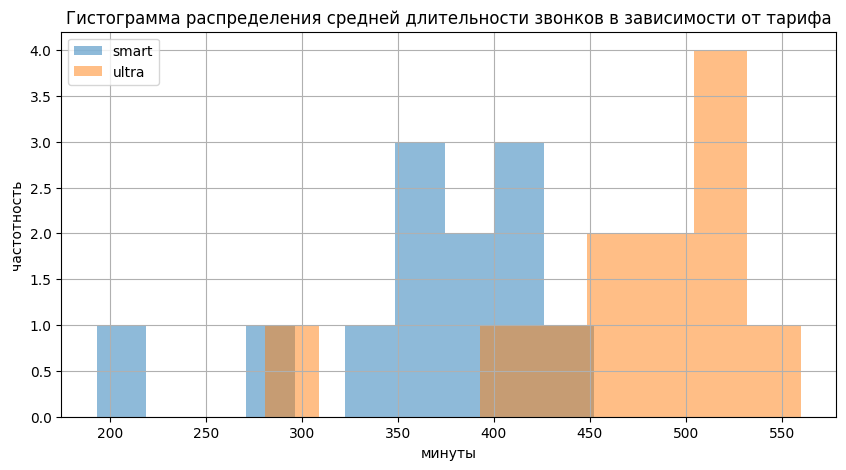

In [46]:
# построим график распределения средней длительности звонков в зависимости от тарифа

hist_traffic_mean('calls_duration', 'средней длительности звонков', 'минуты')

- График рапределения средних значений по длительности звонков по тарифу smart показывает, что большая часть усредненных значений приходится на диапазон примерно от 350 до 420 минут, по тарифу ultra - на 2 диапазона: 430-470 и 500-520 минут

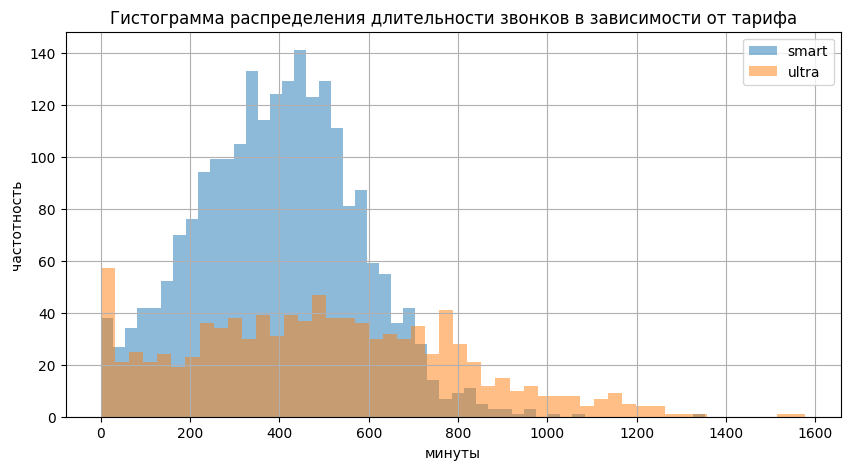

In [47]:
# построим график распределения длительности звонков в зависимости от тарифа

hist_traffic('calls_duration', 'длительности звонков', 'минуты')

- Гистограммы по всем неусредненным значениям по длительности звонков выглядят иначе и представляют собой по обоим тарифам датасэты с положительной скошенностью
- По таким гистограммам значительно сложнее выделить какие-то диапазоны, но зато хорошо видна картина разброса данных, (подтвержденная расчитанными выше значениями усредненных по месяцам диперсией и СКО): **по тарифу ultra разброс данных значительно шире**

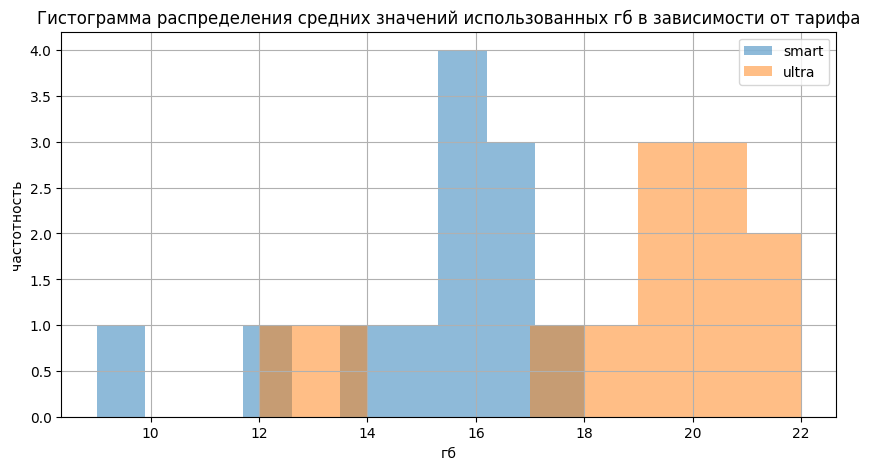

In [48]:
# построим график распределения средних значений использованных гб в зависимости от тарифа

hist_traffic_mean('gb_used', 'средних значений использованных гб', 'гб')

- График рапределения средних значений по количеству использованных гб по тарифу smart показывает, что большая часть усредненных значений приходится на диапазон примерно от 15 до 17 гб, по тарифу ultra - от 17 до 20 гб

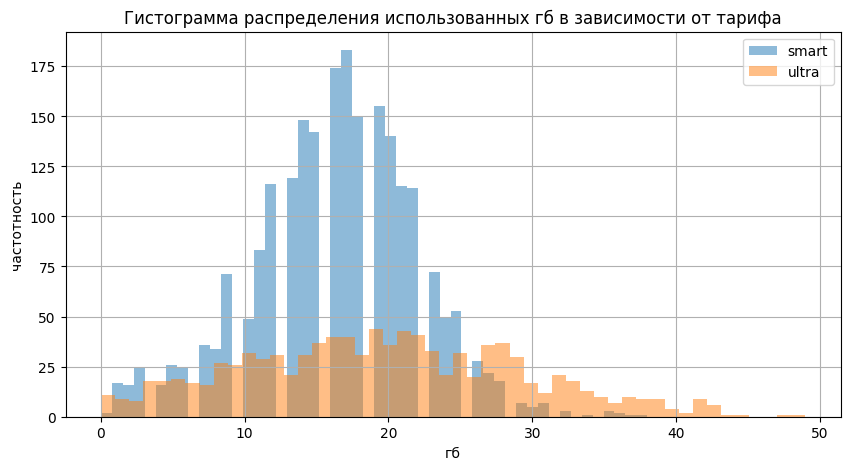

In [49]:
# построим график распределения использованных гб в зависимости от тарифа

hist_traffic('gb_used', 'использованных гб', 'гб')

- Гистограммы по всем неусредненным значениям использованных гб представляют собой по обоим тарифам нормальное распределение
- Здесь, также, как и по длительности звонков **разброс данных значительно шире по тарифу ultra**

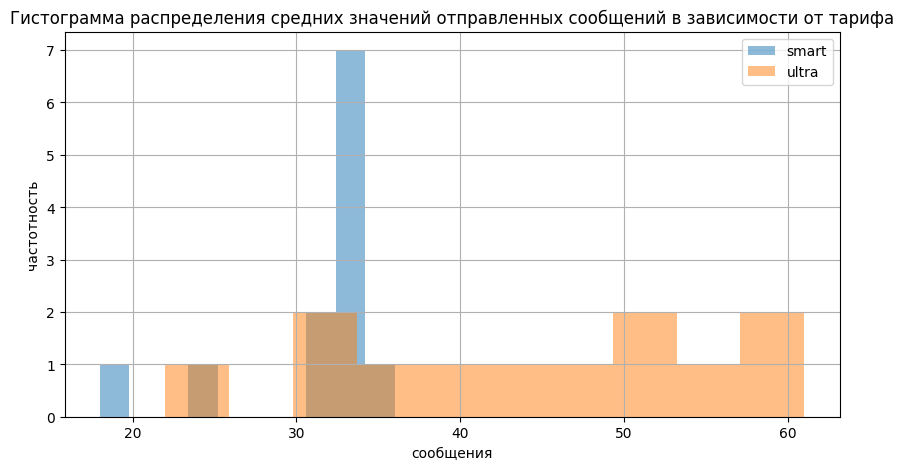

In [50]:
# построим график распределения средних значений отправленных сообщений в зависимости от тарифа

hist_traffic_mean('messages', 'средних значений отправленных сообщений', 'сообщения')

- График рапределения средних значений по количеству отправленных сообщений по тарифу smart показывает, что большая часть усредненных значений находится в районе 40 сообщений, по тарифу ultra - в районе 45-50 и 60-70 сообщений

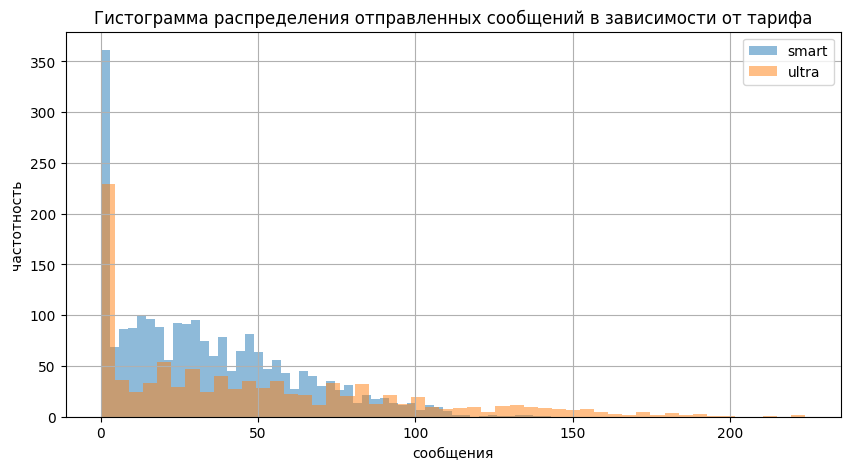

In [51]:
# построим график распределения отправленных сообщений в зависимости от тарифа

hist_traffic('messages', 'отправленных сообщений', 'сообщения')

- Гистограммы по всем неусредненным значениям отправленных сообщений скошены вправо
- Здесь, также **разброс данных значительно шире по тарифу ultra**

### Вывод 4

1) По всем видам трафика (звонки, интернет, сообщения) видна **тенденция к росту среднего количества использованных минут, гб, сообщений в течение года по обоим тарифам**

2) Усредненные по месяцам данные показывают, что пользователи:
- **тарифа smart** чаще всего: звонят примерно от 350 до 420 минут в месяц, тратят примерно по 15-17 гб интернета в месяц и отправляют порядка 40 сообщений в месяц
- **тарифа ultra** чаще всего: звонят примерно по 430-470 или 500-520 минут минут в месяц, тратят примерно по 17-20 гб интернета в месяц и отправляют порядка 45-50 или 60-70 сообщений в месяц

3) По более дешевому тарифу smart пользователи выбирают в среднем за год более 70% включенных в тариф минут и сообщений и почти 100% включенных гб, по тарифу ultra в среднем за год остаются неиспользованными более 80% минут, до 40% гб и до 45% сообщений

4) Исходя из рассчитанных средних помесячных значений дисперсии и СКО и гистограмм распределения неусредненных значений **разброс данных по тарифу ultra по всем видам трафика шире**

## Проверка гипотез

Проверьте гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

### Первая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

1) Поскольку нулевая гипотеза формулируется таким образом, чтобы средние по выборкам были равны, то формулируем гипотезы так:

- **Нулевая гипотеза (H0)**: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- **Альтернативная гипотеза (H1)**: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**, поскольку в статистическом анализе очень часто используетя именно 95-%-ый доверительный интервал

In [52]:
# выделим из общей совокупности 2 выборки с данными по тарифу smart и ultra

sample_1 = data[data['tariff'] == 'smart']['revenue']
sample_2 = data[data['tariff'] == 'ultra']['revenue']

In [53]:
# напишем функцию для построения гистограммы распределения выручки в зависимости от тарифа

def hist_revenue(sample, ylim, tariff):
    sample.hist(bins=50)
    plt.ylim([0, ylim])
    title = 'Гистограмма распределения выручки по тарифу ' + tariff
    plt.title(title)
    plt.xlabel('выручка, руб.')
    plt.ylabel('частотность')
    plt.show()

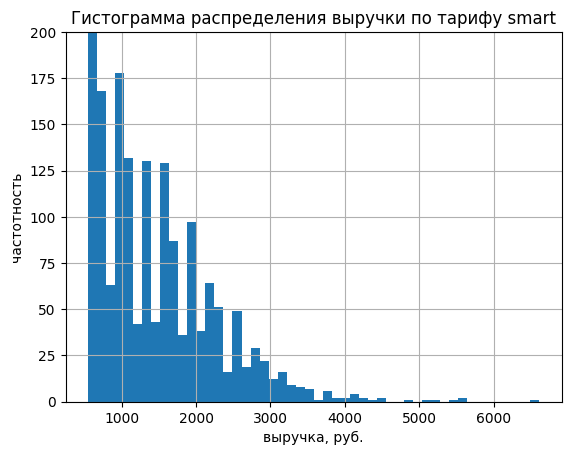

In [54]:
# построим гистограмму распределения выручки по тарифу smart

hist_revenue(sample_1, 200, 'smart')

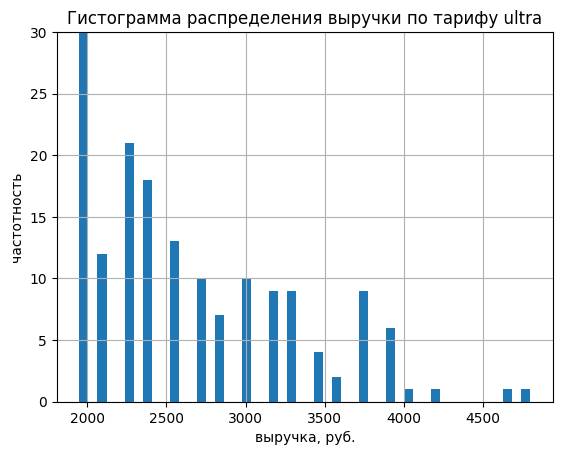

In [55]:
# построим гистограмму распределения выручки по тарифу ultra

hist_revenue(sample_2, 30, 'ultra')

In [56]:
# посчитаем дисперсию выручки по тарифу smart

sample_1.agg({'revenue': np.var})

revenue    641149.068835
Name: revenue, dtype: float64

In [57]:
# посчитаем дисперсию выручки по тарифу ultra

sample_2.agg({'revenue': np.var})

revenue    141516.745079
Name: revenue, dtype: float64

###### По тарифу smart наблюдается существенно больший разброс значений в сравнении с тарифом ultra

In [58]:
# создадим функцию stat для проверки нулевой гипотезы t-тестом 

def stat(sample_1, sample_2):
    alpha = .05 

    results = st.ttest_ind(
        sample_1, 
        sample_2)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [59]:
# проверим нулевую гипотезу, применив функцию

stat(sample_1, sample_2)

p-значение:  8.813878364275262e-179
Отвергаем нулевую гипотезу


Поскольку наша нулевая гипотеза не подтвердилась, исходная гипотеза о том, что <span style="color:red">**средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, подтвердилась.**</span>

### Вторая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

1) Формулируем гипотезы: 
- **Нулевая гипотеза (H0)**: средняя выручка пользователей из Москвы и пользователей из других регионов равны

- **Альтернативная гипотеза (H1)**: средняя выручка пользователей из Москвы и пользователей из других регионов не равны

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**

In [60]:
sample_3 = data[data['city'] == 'Москва']['revenue']
sample_4 = data[data['city'] != 'Москва']['revenue']

stat(sample_3, sample_4)

p-значение:  0.48244885168123464
Не получилось отвергнуть нулевую гипотезу


Поскольку наша нулевая гипотеза подтвердилась, исходная гипотеза о том, что <span style="color:red">**средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, не подтвердилась.**</span>

### Вывод 5

1) Гипотеза о том, что **средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, подтвердилась**

2) Гипотеза о том, что **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, не подтвердилась**

## Определение перспективного тарифа

- Мы выяснили, что по в среднем по 2-м тарифам месячная выручка с 1 пользователя различается
- Посчитаем эту среднюю выручку, сравним ее по тарифам и посмотрим, за счет чего она формируется


In [61]:
# расчет средней выручки с 1 пользователя в месяц, исходя из тарифа

a = round(data[data['tariff'] == 'smart']['revenue'].mean())
b = round(data[data['tariff'] == 'ultra']['revenue'].mean())
c = round((b/a-1)*100)
revenue_per_user = [a, b, c]

pd.DataFrame(
    index=['smart', 'ultra', 'ultra>smart, %'], data=revenue_per_user, columns=['средн. выручка с клиента, руб. в мес.']
)

,"средн. выручка с клиента, руб. в мес."
smart,1257
ultra,2070
"ultra>smart, %",65


In [62]:
# добавим столбец с экстра-расходами (расходы сверх абонентской платы)

data['extra_fee'] = data['revenue'] - data['rub_monthly_fee']

In [63]:
print(
    'доля пользователей по тарифу ultra с экстра-расходами:', round(len(data[(data['tariff'] == 'ultra') &
    (data['extra_fee'] > 0)]['extra_fee'])/ len(data[data['tariff'] == 'ultra']) * 100, 0), '%'
)

доля пользователей по тарифу ultra с экстра-расходами: 14.0 %


In [64]:
print(
    'доля пользователей по тарифу smart с экстра-расходами:', round(len(data[(data['tariff'] == 'smart')
    & (data['extra_fee'] > 0)]['extra_fee'])/ len(data[data['tariff'] == 'smart']) * 100, 0), '%'
)

доля пользователей по тарифу smart с экстра-расходами: 73.0 %


In [65]:
# посчитаем доли тарифов в выручке и выборке по количеству пользователей

d = round((data[data['tariff'] == 'ultra']['revenue'].sum() / data['revenue'].sum()) *100)

e = 100 - d

f = round(len(data[data['tariff'] == 'ultra']['user_id'].unique()) / len(data['user_id'].unique()) * 100, 0)

g = 100 - f

shares = [[d, f], [e, g]]

columns=['доля от сумм. выручки, %', 'доля пользователей в выборке, %']

pd.DataFrame(index=['smart', 'ultra'], data=shares, columns=columns)

,"доля от сумм. выручки, %","доля пользователей в выборке, %"
smart,42,30.0
ultra,58,70.0


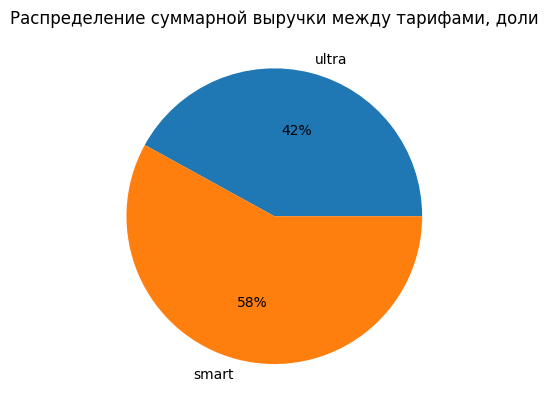

In [66]:
# используем круговую диаграмму для определения долей тарифов в формировании суммарой выручки

labels = ['ultra', 'smart']
revenue_share=[d, e]
explode = [0, 0]
plt.pie(revenue_share, explode, labels, autopct='%1.0f%%')
plt.title('Распределение суммарной выручки между тарифами, доли')
plt.show()

### Вывод 6

1) **выручка с 1 пользователя по тарифу ultra в месяц в среднем на 63% выше, чем с пользователя по тарифу smart** и составляет: 2048 руб. против 1256 руб.

2) при этом по тарифу ultra в отличие от тарифа smart по большему количеству пользователей выручка - это **абонентская плата**; доля пользователей с экстра-расходами всего 12%; это подтверждается выводами, сделанными в пункте 4

3) доля пользователей с тарифом ultra в выборке составляет 29% против 71% по тарифу smart, но при этом **на пользователей с тарифом ultra приходится 40% всей суммарной выручки**, что говорит о большей эффективности данного тарифа в структуре выручки

4) возможно, в дальнейшем компании стоит **рассмотреть вариант с переводом части клиентов с тарифа smart на тариф ultra**, но только по тем клиентам, по которым средняя выручка приближается к абонентской плате по тарифу ultra

## Общий вывод

<span style="color:red">**1. Предобработка данных:**</span>
- в выборке не было пропусков, за исключением столбца churn_date в df_users (не требует замены, т.к. отсутствие значений означает то, что на момент выгрузки тариф еще действовал)
- все столбцы с датами приведены к типу datetime
- удален 1 лишний столбец

<span style="color:red">**2. Расчёты и добавление результатов в таблицу**:</span>
- данные 3-х датасэтов по трафику (звонки, сообщения, интернет) были приведены к месячным значениям
- все 5 датасэтов объединены в единый датасэт
- пропущенные значения, появившиеся в результате объединения, отфильтрованы из датасэта по тем строкам, где есть пропуски по всем 3 видам трафика; остальные пропуски заменены на нулевые значения
- в финальном датасэте добавлены 5 новых столбцов и произведены расчеты по каждому пользователю: количество звонков, их длительность, количество отправленных сообщений, количество использованнных гб и выручка

<span style="color:red">**3. Анализ данных**:</span>

1) По всем видам трафика (звонки, интернет, сообщения) видна **тенденция к росту среднего количества использованных минут, гб, сообщений в течение года по обоим тарифам**

2) Усредненные по месяцам данные показывают, что пользователи:
- **тарифа smart** чаще всего: звонят примерно от 350 до 420 минут в месяц, тратят примерно по 15-17 гб интернета в месяц и отправляют порядка 40 сообщений в месяц
- **тарифа ultra** чаще всего: звонят примерно по 430-470 или 500-520 минут минут в месяц, тратят примерно по 17-20 гб интернета в месяц и отправляют порядка 45-50 или 60-70 сообщений в месяц

3) По более дешевому тарифу smart пользователи выбирают в среднем за год более 70% включенных в тариф минут и сообщений и почти 100% включенных гб, по тарифу ultra в среднем за год остаются неиспользованными более 80% минут, до 40% гб и до 45% сообщений

4) Исходя из рассчитанных средних помесячных значений дисперсии и СКО и гистограмм распределения неусредненных значений **разброс данных по тарифу ultra по всем видам трафика шире**

<span style="color:red">**4. Проверка гипотез**:</span>

1) Гипотеза о том, что **средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, подтвердилась**

2) Гипотеза о том, что **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, не подтвердилась**

<span style="color:red">**5. Определение перспективного тарифа**:</span>

1) **выручка с 1-го пользователя по тарифу ultra в месяц в среднем на 63% выше, чем с пользователя по тарифу smart** и составляет: 2048 руб. против 1256 руб.

2) при этом по тарифу ultra в отличие от тарифа smart по большему количеству пользователей выручка - это **абонентская плата**; доля пользователей с экстра-расходами всего 12%, что подтверждается выводами о неиспользованном трафике (п.4. Анализ данных)

3) доля пользователей с тарифом ultra в выборке составляет 29% против 71% по тарифу smart, но при этом **на пользователей с тарифом ultra приходится 40% всей суммарной выручки**, что говорит о большей эффективности данного тарифа в структуре выручки

4) возможно, в дальнейшем компании стоит **рассмотреть вариант с переводом части клиентов с тарифа smart на тариф ultra**, но только по тем клиентам, по которым средняя выручка приближается к абонентской плате по тарифу ultra